R-squared: 0.9994541882863717


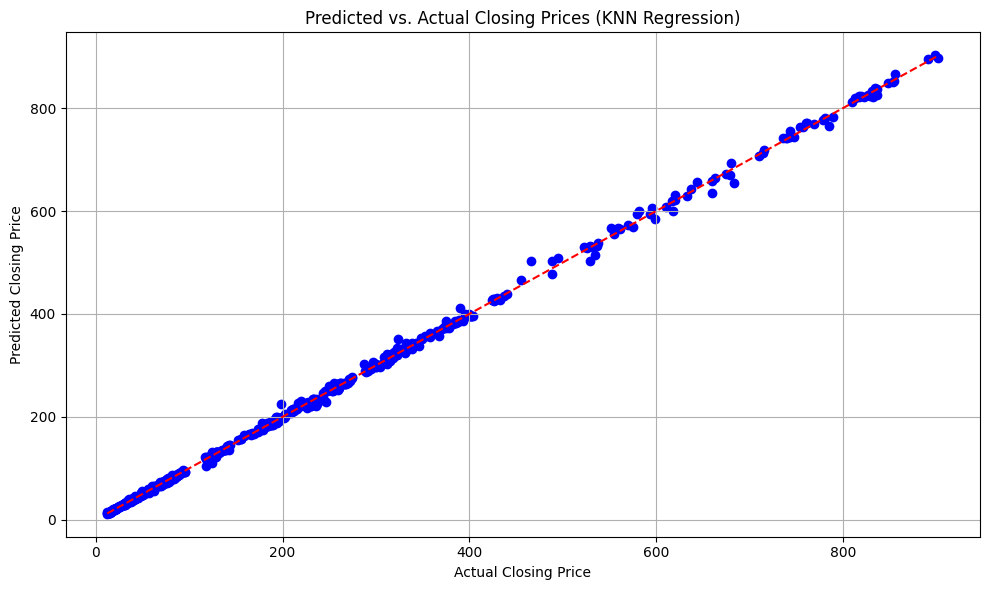

Training time: 0.0030548572540283203


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import time

# Step 1: Load the data
# Assuming the first column represents the date
data = pd.read_csv('amazon.csv')

# Step 2: Preprocess the data
# Assuming the first column represents the date and the last column represents the closing price
dates = pd.to_datetime(data.iloc[:, 0])  # Convert the first column to datetime
closing_prices = data.iloc[:, -2]  # Assuming the last but one column represents the closing price

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dates, closing_prices, test_size=0.2, random_state=42)

# Step 4: Train the KNN regression model and measure training time
start_time = time.time()
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train.values.reshape(-1, 1), y_train)
end_time = time.time()
training_time = end_time - start_time

# Step 5: Make predictions on the test data
y_pred = knn_regressor.predict(X_test.values.reshape(-1, 1))

# Step 6: Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Step 7: Plot the predicted versus actual closing prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs. Actual Closing Prices (KNN Regression)')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print training time
print('Training time:', training_time)


Training Time:  0.0015273094177246094
Prediction Time:  0.0045626163482666016
Mean Squared Error:  205.84209022119953


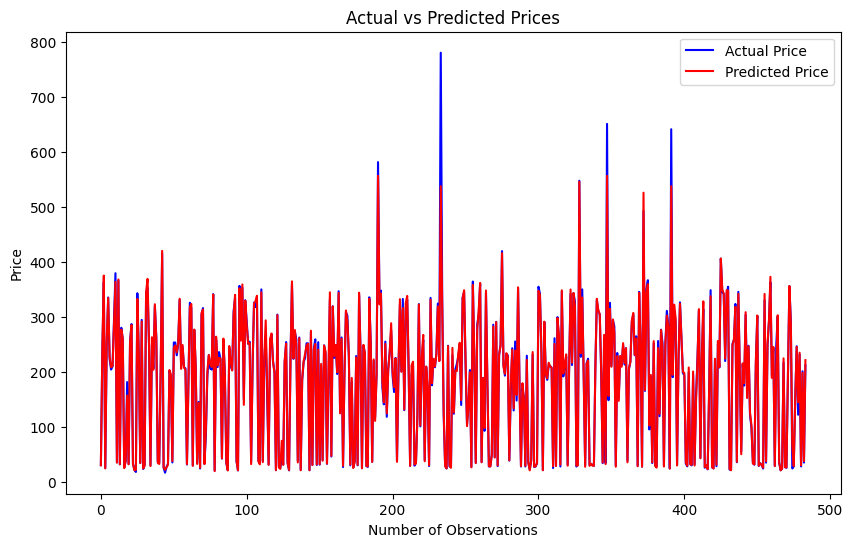

In [4]:
# Import necessary libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('TSLA.csv')

# Convert the date column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Create new columns for year, month, and day
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day

# Now you can drop the original 'Date' column
dataset = dataset.drop(columns=['Date'])


# Assume 'Close' is the column for closing prices
X = dataset.iloc[:, :-1].values
y = dataset['Close'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the KNN model on the training data
knn = KNeighborsRegressor(n_neighbors=5)

# Calculate training time
start_time = time.time()
knn.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print("Training Time: ", training_time)

# Calculate prediction time
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
print("Prediction Time: ", prediction_time)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_pred, color='red', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Number of Observations')
plt.ylabel('Price')
plt.legend()
plt.show()
